# **Spam Email Detection**

### **Importing Necessary Library**  

In [1]:
import numpy as NP 
import pandas as PD 
import matplotlib.pyplot as PLT
import seaborn as SNS
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

### **Read the Data Set**

In [2]:
DATA=PD.read_csv('enronSpamSubset.csv')
DATA.head(5)

,Unnamed: 0.1,Unnamed: 0,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


### **Drop Unnecessary Columns**

In [3]:
# Drop unnecessary columns
DATA.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)
DATA.rename(columns={'Body':'Message'},inplace=True)
DATA.head()

,Message,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


### **View Information About the Data**

In [4]:
DATA.info()
DATA.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  10000 non-null  object
 1   Label    10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


(10000, 2)

### **View the Number of Duplicates and Drop Them**  

In [5]:
DATA.duplicated().sum()

313

In [6]:
DATA=DATA.drop_duplicates(keep='first')
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9687 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  9687 non-null   object
 1   Label    9687 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 227.0+ KB


### **View the Distribution of Emails 'Ham' and 'Spam'** 

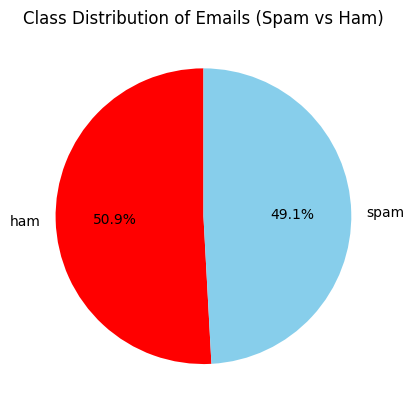

Label
0    4927
1    4760
Name: count, dtype: int64

In [7]:
# Count the number of each class 'spam' and 'ham'
category_counts = DATA['Label'].value_counts() # Series that contains each value in the column 'Label' and the count of it. 
PLT.pie(category_counts, labels=['ham','spam'], autopct='%1.1f%%', startangle=90,colors=['red','skyblue']) # Plotting the Distribution
PLT.title('Class Distribution of Emails (Spam vs Ham)')
PLT.show()
category_counts

### **Some Statices About the Data**

In [8]:
DF_St=PD.DataFrame(DATA[['Message','Label']])
#Length of the Message
DF_St['Num_characters'] = DF_St['Message'].apply(len)
#Number of Words
DF_St['Num_words'] = DF_St['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
#Number of Sentences
DF_St['Num_sentences'] = DF_St['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

DF_St


,Message,Label,Num_characters,Num_words,Num_sentences
0,Subject: stock promo mover : cwtd\n * * * urge...,1,6210,1099,43
1,Subject: are you listed in major search engine...,1,898,231,11
2,"Subject: important information thu , 30 jun 20...",1,779,150,13
3,Subject: = ? utf - 8 ? q ? bask your life with...,1,543,120,19
4,"Subject: "" bidstogo "" is places to go , things...",1,1283,250,19
...,...,...,...,...,...
9995,"Subject: monday 22 nd oct\n louise ,\n do you ...",0,154,39,4
9996,Subject: missing bloomberg deals\n stephanie -...,0,7864,1806,64
9997,Subject: eops salary survey questionnaire\n we...,0,1343,330,7
9998,"Subject: q 3 comparison\n hi louise ,\n i have...",0,279,68,6


In [9]:
DF_St.describe()

,Label,Num_characters,Num_words,Num_sentences
count,9687.000000,9687.000000,9687.000000,9687.000000
mean,0.491380,1533.592753,312.492722,18.937648
std,0.499951,3922.609088,775.975772,57.734667
min,0.000000,10.000000,2.000000,1.000000
25%,0.000000,353.000000,73.000000,5.000000
50%,0.000000,719.000000,152.000000,10.000000
75%,1.000000,1573.000000,328.000000,19.000000
max,1.000000,121502.000000,23345.000000,3093.000000


### **Plotting the corelation of the Statices**

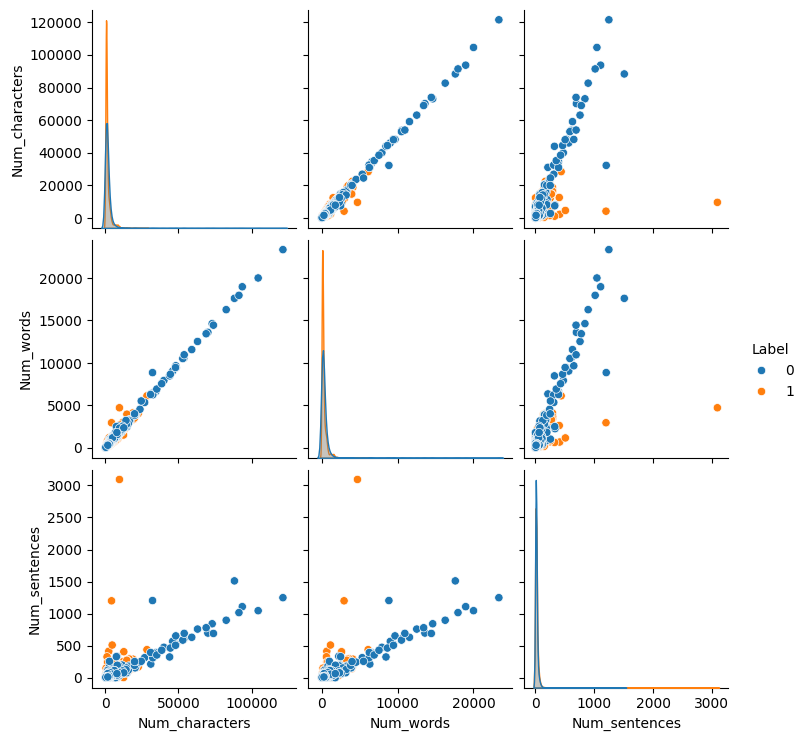

In [10]:
SNS.pairplot(DF_St,hue='Label')

<Axes: >

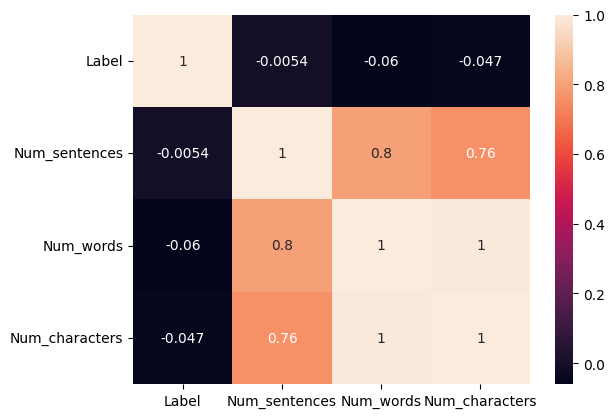

In [11]:
SNS.heatmap(DF_St[['Label','Num_sentences','Num_words','Num_characters']].corr(),annot=True)

### **Define the Processing Function**

In [12]:
# Define text preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [13]:
# Applying the function to the Data
DATA['cleaned_Message'] = DATA['Message'].apply(preprocess_text) 
#  removing the word "subject" from the the beginning of each sell in 'Message' Column
DATA['cleaned_Message'] = DATA['cleaned_Message'].str.replace(r'subject', '', regex=True)
DATA.head(10)

,Message,Label,cleaned_Message
0,Subject: stock promo mover : cwtd\n * * * urge...,1,stock promo mover cwtd urgent investor tradin...
1,Subject: are you listed in major search engine...,1,listed major search engines submitting websit...
2,"Subject: important information thu , 30 jun 20...",1,important information thu jun important info...
3,Subject: = ? utf - 8 ? q ? bask your life with...,1,utf q bask life utf q individual incremen utf...
4,"Subject: "" bidstogo "" is places to go , things...",1,bidstogo places go things hello privacy polic...
5,Subject: dont pay more than $ 100 for ur softw...,1,dont pay ur softwares miseries chheap softtwa...
6,Subject: paliourg\n micros 0 ft for pennies\n ...,1,paliourg micros ft pennies check em carney ha...
7,"Subject: all graphics software available , che...",1,graphics software available cheap oem version...
8,"Subject: the man of stteel\n hello , welcome t...",1,man stteel hello welcome medzonlin direction ...
9,"Subject: adjourn pasteup\n paliourg ,\n lookin...",1,adjourn pasteup paliourg looking expensive hi...


### **Define the Lemmatization Function**

In [14]:
lemma=WordNetLemmatizer()
# Define a function for lemmatization
def lemmatize_text(text):
    return " ".join([lemma.lemmatize(word) for word in text.split()])


In [15]:
# Applying the Lemmatization Function to the Data 
DATA['Message_lemmatized'] = DATA['cleaned_Message'].apply(lemmatize_text)
DATA

,Message,Label,cleaned_Message,Message_lemmatized
0,Subject: stock promo mover : cwtd\n * * * urge...,1,stock promo mover cwtd urgent investor tradin...,stock promo mover cwtd urgent investor trading...
1,Subject: are you listed in major search engine...,1,listed major search engines submitting websit...,listed major search engine submitting website ...
2,"Subject: important information thu , 30 jun 20...",1,important information thu jun important info...,important information thu jun important inform...
3,Subject: = ? utf - 8 ? q ? bask your life with...,1,utf q bask life utf q individual incremen utf...,utf q bask life utf q individual incremen utf ...
4,"Subject: "" bidstogo "" is places to go , things...",1,bidstogo places go things hello privacy polic...,bidstogo place go thing hello privacy policy p...
...,...,...,...,...
9995,"Subject: monday 22 nd oct\n louise ,\n do you ...",0,monday nd oct louise half hour free diary see...,monday nd oct louise half hour free diary see ...
9996,Subject: missing bloomberg deals\n stephanie -...,0,missing bloomberg deals stephanie believe fou...,missing bloomberg deal stephanie believe found...
9997,Subject: eops salary survey questionnaire\n we...,0,eops salary survey questionnaire need establi...,eops salary survey questionnaire need establis...
9998,"Subject: q 3 comparison\n hi louise ,\n i have...",0,q comparison hi louise comparison first two w...,q comparison hi louise comparison first two we...


### **Shuffling the Data**  

In [16]:
from sklearn.utils import shuffle

# Shuffle the dataset
shuffled_data = shuffle(DATA, random_state=42).reset_index(drop=True)

shuffled_data.head(10)

,Message,Label,cleaned_Message,Message_lemmatized
0,"Subject: re : chapter\n dear vince ,\n that ' ...",0,chapter dear vince fine know changed grant ea...,chapter dear vince fine know changed grant ear...
1,Subject: 98 - 6892 overflow\n can you please e...,0,overflow please extend sitara deal ticket th ...,overflow please extend sitara deal ticket th d...
2,Subject: unique idea : $ 50 no wager requireme...,1,unique idea wager requirement bonus vegas tow...,unique idea wager requirement bonus vega tower...
3,Subject: my portfolio\n hi\n my name is ernie ...,1,portfolio hi name ernie may right email addre...,portfolio hi name ernie may right email addres...
4,Subject: you need only 15 minutes to prepare f...,1,need minutes prepare night love extra power t...,need minute prepare night love extra power thi...
5,Subject: news alert ( cinm ) launches new prod...,1,news alert cinm launches new product mobile c...,news alert cinm launch new product mobile cinm...
6,Subject: same day change - revision # 2 - txu ...,0,day change revision txu fuel trans k november...,day change revision txu fuel trans k november ...
7,Subject: cialis is $ 5 . 75 per 20 mg pill and...,1,cialis per mg pill lasts straight hours lowco...,cialis per mg pill last straight hour lowcost ...
8,"Subject: re : check\n vince ,\n ?\n please fin...",0,check vince please find attached invoice sent...,check vince please find attached invoice sent ...
9,"Subject: be a "" big "" men ! locative\n our zen...",1,big men locative zenextend pen enlargement p ...,big men locative zenextend pen enlargement p i...


### **Importing the TF-IDF Vectorizer for Feature Extraction** 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # Limit to 2000 most important features


### **Splitting the Data to Train and Test Sets and View the Distribution of Each Set** 

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(
    shuffled_data['Message_lemmatized'],  # Features (processed text)
    shuffled_data['Label'],               # Target labels
    test_size=0.25,                       # Proportion for the testing set
    random_state=42,                      # Ensure reproducibility
    stratify=shuffled_data['Label']       # Maintain class balance when splitting the Data
)
# Print dataset sizes
print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")


Training Set Size: 7265
Testing Set Size: 2422


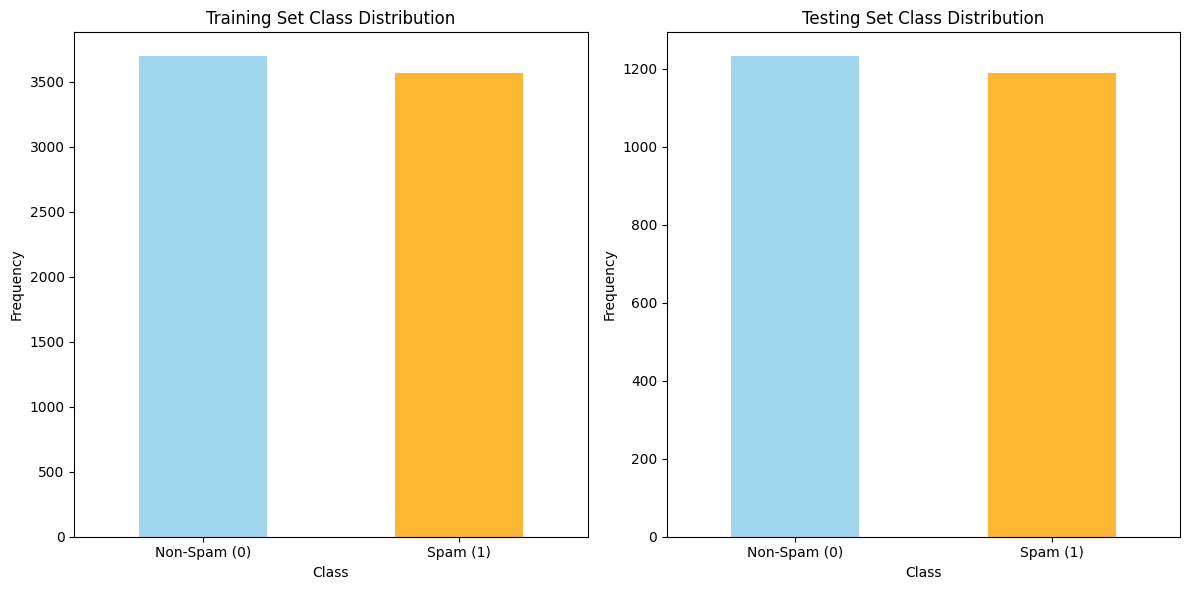

(Label
 0    3695
 1    3570
 Name: count, dtype: int64,
 Label
 0    1232
 1    1190
 Name: count, dtype: int64)

In [19]:
# View the class distribution in the training and testing sets
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

# Plotting class distribution for training set
PLT.figure(figsize=(12, 6))
PLT.subplot(1, 2, 1)
train_counts.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)
PLT.title('Training Set Class Distribution')
PLT.xlabel('Class')
PLT.ylabel('Frequency')
PLT.xticks(ticks=[0, 1], labels=['Non-Spam (0)', 'Spam (1)'], rotation=0)

# Plotting class distribution for testing set
PLT.subplot(1, 2, 2)
test_counts.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)
PLT.title('Testing Set Class Distribution')
PLT.xlabel('Class')
PLT.ylabel('Frequency')
PLT.xticks(ticks=[0, 1], labels=['Non-Spam (0)', 'Spam (1)'], rotation=0)

PLT.tight_layout()
PLT.show()

train_counts,test_counts

### **Importing the Support Vector Machine (SVM) and Train it**

Confusion Matrix:


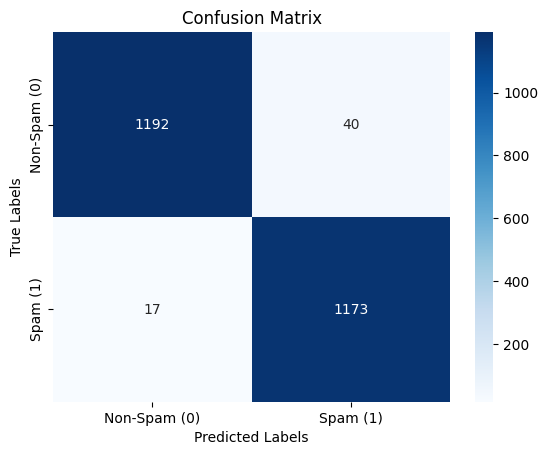

Training Accuracy: 0.98
Test Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1232
           1       0.97      0.99      0.98      1190

    accuracy                           0.98      2422
   macro avg       0.98      0.98      0.98      2422
weighted avg       0.98      0.98      0.98      2422



In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the SVM model
SVC_model = SVC(kernel='linear', random_state=42,C=0.1)

# Train the model
SVC_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = SVC_model.predict(X_test_tfidf)

# Evaluate model performance
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
SNS.heatmap(conf_matrix, annot=True,fmt="d", cmap='Blues', xticklabels=['Non-Spam (0)', 'Spam (1)'], yticklabels=['Non-Spam (0)', 'Spam (1)'])
PLT.title('Confusion Matrix')
PLT.xlabel('Predicted Labels')
PLT.ylabel('True Labels')
PLT.show()

# Calculate accuracy for training and test sets
train_accuracy = SVC_model.score(X_train_tfidf, y_train)
test_accuracy = SVC_model.score(X_test_tfidf, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

### **Importing the Logistic Regression (LR) and Train it**

Logistic Regression Confusion Matrix:


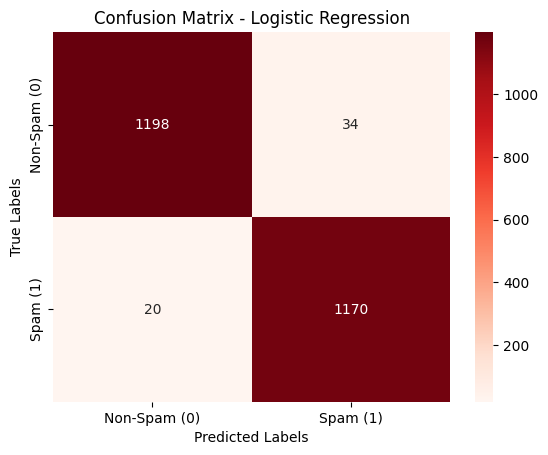

Training Accuracy: 0.99
Test Accuracy: 0.98

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1232
           1       0.97      0.98      0.98      1190

    accuracy                           0.98      2422
   macro avg       0.98      0.98      0.98      2422
weighted avg       0.98      0.98      0.98      2422



In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
LR_model = LogisticRegression(random_state=42)

# Train the model
LR_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_lr = LR_model.predict(X_test_tfidf)

# Evaluate model performance
print("Logistic Regression Confusion Matrix:")
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
SNS.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Reds', xticklabels=['Non-Spam (0)', 'Spam (1)'], yticklabels=['Non-Spam (0)', 'Spam (1)'])
PLT.title('Confusion Matrix - Logistic Regression')
PLT.xlabel('Predicted Labels')
PLT.ylabel('True Labels')
PLT.show()

# Calculate accuracy for training and test sets
train_accuracy = LR_model.score(X_train_tfidf, y_train)
test_accuracy = LR_model.score(X_test_tfidf, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


### **Importing the Random Forest Classifier (RF) and Train it**

Random Forest Confusion Matrix:


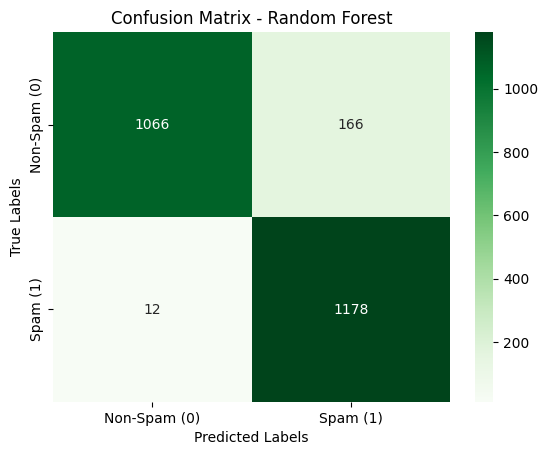

Training Accuracy: 0.94
Test Accuracy: 0.93

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1232
           1       0.88      0.99      0.93      1190

    accuracy                           0.93      2422
   macro avg       0.93      0.93      0.93      2422
weighted avg       0.93      0.93      0.93      2422



In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
RF_model = RandomForestClassifier(
       n_estimators=100,         # Number of trees
    max_depth=10,             # Limit tree depth to prevent overfitting
    max_features='sqrt',      # Use only a subset of features for each split
    min_samples_split=10,     # Minimum samples to split a node
    min_samples_leaf=5,       # Minimum samples required in leaf nodes
    random_state=42
)

# Train the model
RF_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = RF_model.predict(X_test_tfidf)

# Evaluate model performance
print("Random Forest Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
SNS.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Spam (0)', 'Spam (1)'], yticklabels=['Non-Spam (0)', 'Spam (1)'])
PLT.title('Confusion Matrix - Random Forest')
PLT.xlabel('Predicted Labels')
PLT.ylabel('True Labels')
PLT.show()

# Calculate accuracy for training and test sets
train_accuracy = RF_model.score(X_train_tfidf, y_train)
test_accuracy = RF_model.score(X_test_tfidf, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


### **Importing the Naive Bayes (NB) and Train it**

Naive Bayes Confusion Matrix:


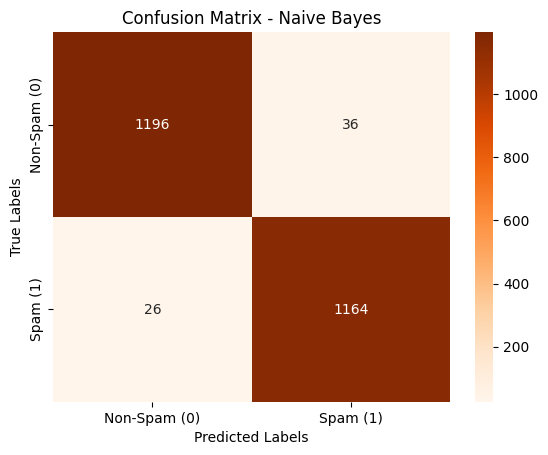

Training Accuracy: 0.98
Test Accuracy: 0.97

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1232
           1       0.97      0.98      0.97      1190

    accuracy                           0.97      2422
   macro avg       0.97      0.97      0.97      2422
weighted avg       0.97      0.97      0.97      2422



In [23]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes model
NB_model = MultinomialNB()

# Train the model
NB_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = NB_model.predict(X_test_tfidf)

# Evaluate model performance
print("Naive Bayes Confusion Matrix:")
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
SNS.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=['Non-Spam (0)', 'Spam (1)'], yticklabels=['Non-Spam (0)', 'Spam (1)'])
PLT.title('Confusion Matrix - Naive Bayes')
PLT.xlabel('Predicted Labels')
PLT.ylabel('True Labels')
PLT.show()

# Calculate accuracy for training and test sets
train_accuracy = NB_model.score(X_train_tfidf, y_train)
test_accuracy = NB_model.score(X_test_tfidf, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


### **Importing the DecisionTreeClassifier (DT) and Train it**

DecisionTree Confusion Matrix:


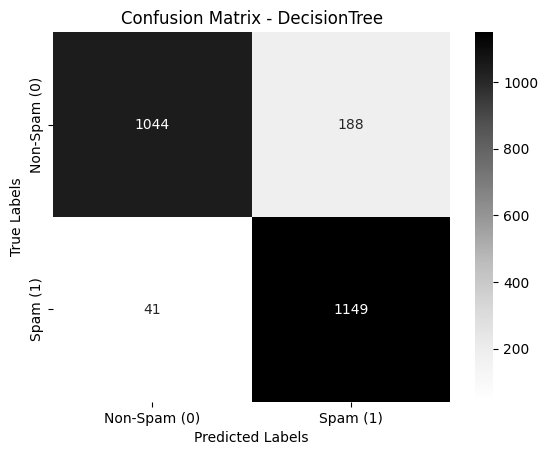

Training Accuracy: 0.92
Test Accuracy: 0.91

DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1232
           1       0.86      0.97      0.91      1190

    accuracy                           0.91      2422
   macro avg       0.91      0.91      0.91      2422
weighted avg       0.91      0.91      0.91      2422



In [24]:
from sklearn.tree import DecisionTreeClassifier

# Initialize DecisionTreeClassifier model
DT_model = DecisionTreeClassifier(
      max_depth=10,            # Limit the depth of the tree
    min_samples_split=10,    # Minimum samples to split a node
    min_samples_leaf=5,      # Minimum samples required in leaf nodes
    random_state=42
)

# Train the model
DT_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_dt = DT_model.predict(X_test_tfidf)

# Evaluate model performance
print("DecisionTree Confusion Matrix:")
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
SNS.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Grays', xticklabels=['Non-Spam (0)', 'Spam (1)'], yticklabels=['Non-Spam (0)', 'Spam (1)'])
PLT.title('Confusion Matrix - DecisionTree')
PLT.xlabel('Predicted Labels')
PLT.ylabel('True Labels')
PLT.show()

# Calculate accuracy for training and test sets
train_accuracy = DT_model.score(X_train_tfidf, y_train)
test_accuracy = DT_model.score(X_test_tfidf, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nDecisionTree Classification Report:")
print(classification_report(y_test, y_pred_dt))
